In [53]:
# Nouran Ahmed    20200609
# Nada Alaa Elden 20200589
# Mariam Hany     20200532
# Hady Abdallah   20200617
# Mohamed Essam   20200464

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import re
from gensim.models import Word2Vec
import multiprocessing
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.metrics import accuracy_score, classification_report
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from tabulate import tabulate

import warnings
warnings.filterwarnings("ignore")

In [55]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\noran\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\noran\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\noran\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\noran\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [56]:
# read the dataset
df = pd.read_csv("Spam_Email_Data.csv")
# Print information about the dataset
print(df.head())

                                                text  target
0  From ilug-admin@linux.ie Mon Jul 29 11:28:02 2...       0
1  From gort44@excite.com Mon Jun 24 17:54:21 200...       1
2  From fork-admin@xent.com Mon Jul 29 11:39:57 2...       1
3  From dcm123@btamail.net.cn Mon Jun 24 17:49:23...       1
4  From ilug-admin@linux.ie Mon Aug 19 11:02:47 2...       0


Info about the dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5796 entries, 0 to 5795
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5796 non-null   object
 1   target  5796 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 90.7+ KB
None
------------------------------------------
target
0    3900
1    1896
Name: count, dtype: int64
-------------------------------------------


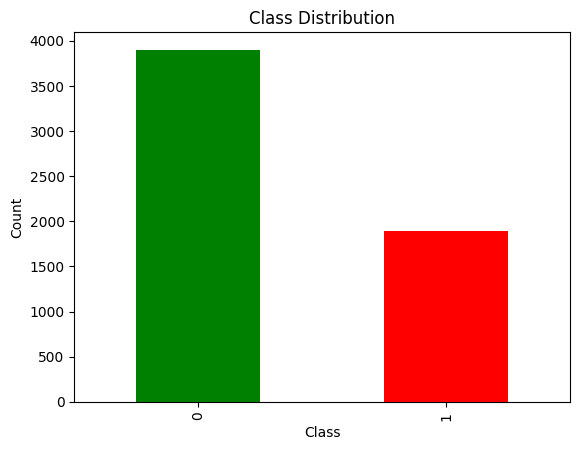

In [57]:
# Examining the distribution of samples in each class.
# info about the dataset
print("Info about the dataset: ")
print(df.info())
print("------------------------------------------")
# count the num of samples in each class
class_distribution = df['target'].value_counts()
print(class_distribution)
print("-------------------------------------------")
class_distribution.plot(kind='bar', color=['green', 'red'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [58]:
# separating targets and features
target_column = ['target']
X = df.drop(target_column, axis=1)
y = pd.DataFrame(df['target'], columns=['target'])
print(X.head()) #features
print(y.head()) #target

                                                text
0  From ilug-admin@linux.ie Mon Jul 29 11:28:02 2...
1  From gort44@excite.com Mon Jun 24 17:54:21 200...
2  From fork-admin@xent.com Mon Jul 29 11:39:57 2...
3  From dcm123@btamail.net.cn Mon Jun 24 17:49:23...
4  From ilug-admin@linux.ie Mon Aug 19 11:02:47 2...
   target
0       0
1       1
2       1
3       1
4       0


In [59]:
def Data_Preprocessing(data):
    # remove HTML tags
    data = re.sub(r'<[^>]+>', '', data)
    
    # Remove email addresses
    data = re.sub(r'\b\S+@\S+\b', '', data)  

    
    # Convert to lowercase
    data = data.lower()  
    
    # Tokenization
    tokens = word_tokenize(data)   
    
    # Remove punctuation and stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token.isalpha() and token not in stop_words]

    # Lemmatization => reduces words to their base form
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    
    # Convert tokens into text again (into single string)
    preprocessed_data = ' '.join(lemmatized_tokens)
    return preprocessed_data

In [60]:
# Apply preprocessing to the text column
X['text'] = X['text'].apply(Data_Preprocessing)

print("Show preprocessed data:")
print(X['text'].head())

Show preprocessed data:
0    mon jul received localhost localhost postfix e...
1    mon jun tue jun received esmtp id tue jun rece...
2    mon jul received localhost localhost postfix e...
3    mon jun mon jun received esmtp id mon jun rece...
4    mon aug received localhost localhost postfix e...
Name: text, dtype: object


In [61]:
# count_vectorizer
count_vectorizer = CountVectorizer()                   
X_count_vectorizer = count_vectorizer.fit_transform(X['text']) 

# split the feature col to training and testing data
X_train_count_vectorizer, X_test_count_vectorizer, y_train, y_test = train_test_split(X_count_vectorizer, y, test_size=0.4, random_state=42)

# Convert X_count_vectorizer to a DataFrame
X_count_vectorizer_df = pd.DataFrame(X_count_vectorizer.toarray(), columns=count_vectorizer.get_feature_names_out())
print("Data with count vectorizer: " )
print(X_count_vectorizer_df['text'].head())
print("")


Data with count vectorizer: 
0    0
1    0
2    0
3    0
4    0
Name: text, dtype: int64



In [62]:
# TF_IDF
TF_IDF = TfidfVectorizer()
X_tfidf = TF_IDF.fit_transform(X['text'])

X_train_tfidf, X_test_tfidf,_ , _ = train_test_split(X_tfidf, y, test_size=0.4, random_state=42)

# Convert X_tfidf to a DataFrame
X_tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns = TF_IDF.get_feature_names_out())
print("Data with TF_IDF: " )
print(X_tfidf_df['text'].head())
print("")



Data with TF_IDF: 
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: text, dtype: float64



In [63]:
# Decision tree 
decision_tree_CountVector = DecisionTreeClassifier()
decision_tree_TFIDF = DecisionTreeClassifier()

# Logistic Regression
logistic_regression_CountVectorizer = LogisticRegression()
logistic_regression_TFIDF = LogisticRegression()

# Train models with TF_IDF
decision_tree_TFIDF.fit(X_train_tfidf, y_train)
logistic_regression_TFIDF.fit(X_train_tfidf, y_train)

# Train models with Count Vectorizer
decision_tree_CountVector.fit(X_train_count_vectorizer, y_train)
logistic_regression_CountVectorizer.fit(X_train_tfidf, y_train)

LogisticRegression()

In [64]:
# Word2Vec
# tokenize the data and store it in another col
X['tokens'] = X['text'].apply(word_tokenize)

# train the model
word2vec_model = Word2Vec(sentences = X['tokens'], vector_size=100, window=5, min_count=2,sg=0)

# get word embeddings from word2vec
word_embeddings = word2vec_model.wv

document_embeddings = []
for tokens in X['tokens']:
    doc_embedding = np.mean([word_embeddings[token] for token in tokens if token in word_embeddings], axis=0)
    document_embeddings.append(doc_embedding)


In [65]:
# splitting for word2vector
X_train_W2V, X_test_W2V, _, _ = train_test_split(document_embeddings, y, test_size=0.4, random_state=42)

# Decision Tree and Logistic models for Word2Vec
decision_tree_W2V = DecisionTreeClassifier()
logistic_regression_W2V = LogisticRegression()

# Training the models with data
logistic_regression_W2V.fit(X_train_W2V, y_train)
decision_tree_W2V.fit(X_train_W2V, y_train)

DecisionTreeClassifier()

In [66]:
# Initialize and train the Doc2Vec model

# function to add a unique ID to each document (row)
def tag_docs(tokens):
    taged_documents = []
    for i in range(len(tokens)):
        taged_documents.append(TaggedDocument(words=tokens[i], tags=[str(i)]))
    return taged_documents

# rows (documents) with their tags
tagged_documents = tag_docs(X['tokens'])

# train the model
model = Doc2Vec(documents = tagged_documents, vector_size=100, window=5, min_count=1)

# Document vectors after training
document_vectors = [model.dv[idx] for idx in range(len(tagged_documents))]

In [67]:
X_train_Doc2Vec, X_test_Doc2Vec, _, _ = train_test_split(document_vectors, y, test_size=0.4, random_state=42)

# Decision Tree and Logistic models for Doc2Vec
decision_tree_Doc2Vec = DecisionTreeClassifier()
logistic_regression_Doc2Vec = LogisticRegression()

# Training the models with data
logistic_regression_Doc2Vec.fit(X_train_Doc2Vec, y_train)
decision_tree_Doc2Vec.fit(X_train_Doc2Vec, y_train)

DecisionTreeClassifier()

In [68]:
# Predictions with Logistic Regression model
y_predict_CountVectorizer_Logistic = logistic_regression_CountVectorizer.predict(X_test_count_vectorizer)
y_predict_TFIDF_Logistic = logistic_regression_TFIDF.predict(X_test_tfidf)
y_predict_word2vec_Logistic = logistic_regression_W2V.predict(X_test_W2V)
y_predict_D2V_Logistic = logistic_regression_Doc2Vec.predict(X_test_Doc2Vec)

# Predictions with Decision Tree
y_predict_CountVectorizer_DT = decision_tree_CountVector.predict(X_test_count_vectorizer)
y_predict_TFIDF_DT = decision_tree_TFIDF.predict(X_test_tfidf)
y_predict_word2vec_DT = decision_tree_W2V.predict(X_test_W2V)
y_predict_D2V_DT = decision_tree_Doc2Vec.predict(X_test_Doc2Vec)

In [71]:
evaluationAns = []
# function to evaluate the different models with different embeddings
def evaluate(y_test, y_predict, modelName, embeddingType):
    precision = precision_score(y_test, y_predict)
    recall = recall_score(y_test, y_predict)
    f1 = f1_score(y_test, y_predict)
    accuracy = accuracy_score(y_test, y_predict)
    evaluationAns.append(
        {
            "Model Name ": modelName,
            "Embedding ": embeddingType,
            "Precision ": precision,
            "Recall ": recall,
            "F1_score ": f1,
            "Accuracy ": accuracy
        }
    )

In [72]:
evaluate(y_test,y_predict_CountVectorizer_Logistic, "Logistic", "Count Vectorizer")   
evaluate(y_test,y_predict_TFIDF_Logistic, "Logistic", "TF_IDF")  
evaluate(y_test,y_predict_word2vec_Logistic, "Logistic", "Word2Vec")
evaluate(y_test,y_predict_D2V_Logistic, "Logistic", "Doc2Vec") 


evaluate(y_test,y_predict_TFIDF_DT, "Decision Tree", "TF_IDF")
evaluate(y_test,y_predict_CountVectorizer_DT, "Decision Tree", "Count Vectorizer") 
evaluate(y_test,y_predict_word2vec_DT, "Decision Tree", "Word2Vec") 
evaluate(y_test,y_predict_D2V_DT, "Decision Tree", "Doc2Vec")
 
evaluationDF = pd.DataFrame(evaluationAns)

# Display DataFrame as a table
print(tabulate(evaluationDF, headers='keys', tablefmt='pipe'))

  
# print(evaluationDF)

|    | Model Name    | Embedding        |   Precision  |   Recall  |   F1_score  |   Accuracy  |
|---:|:--------------|:-----------------|-------------:|----------:|------------:|------------:|
|  0 | Logistic      | Count Vectorizer |     0.99572  |  0.930667 |    0.962095 |    0.976283 |
|  1 | Logistic      | TF_IDF           |     0.998553 |  0.92     |    0.957668 |    0.973696 |
|  2 | Logistic      | Word2Vec         |     0.990371 |  0.96     |    0.974949 |    0.984045 |
|  3 | Logistic      | Doc2Vec          |     0.955182 |  0.909333 |    0.931694 |    0.956878 |
|  4 | Decision Tree | TF_IDF           |     0.951482 |  0.941333 |    0.946381 |    0.965502 |
|  5 | Decision Tree | Count Vectorizer |     0.946667 |  0.946667 |    0.946667 |    0.965502 |
|  6 | Decision Tree | Word2Vec         |     0.961111 |  0.922667 |    0.941497 |    0.962915 |
|  7 | Decision Tree | Doc2Vec          |     0.837653 |  0.818667 |    0.828051 |    0.890039 |
